In [1]:
import pandas as pd
from  matplotlib import pyplot as plt
import numpy as np

C:\Users\brean\AppData\Local\Temp\ipykernel_6800\541810407.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Question 1: For dataset “real_estate.csv”, write Jupyter Notebook scripts to do the following sequential steps:

- Data import
  - Import the real estate data into python

In [20]:
real_estate = pd.read_csv("./real_estate.csv")
    

- Descriptive statistics of the house variables
  - Produce a Pandas DataFrame to show how many missing values there are for each variable (columns) and what percentage of the values are missing for each variable.
  - Use the ‘’describe” function in Pandas DataFrame to see some descriptive statistics for this data. Usage of this function can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html


In [25]:
missing_realestate = real_estate.isnull().sum()

pd.DataFrame({"amount_missing": missing_realestate, 
              "percent_missing": (missing_realestate / real_estate.shape[0])*100})


,amount_missing,percent_missing
op_type,0,0.000000
district,15,0.319898
street,452,9.639582
rooms,189,4.030710
area,364,7.762849
floor,333,7.101727
total_floors,344,7.336319
house_seria,442,9.426317
house_type,450,9.596929
condition,406,8.658563


In [4]:
real_estate.describe(include="all")

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
count,4689,4674,4237,4500,4325.000000,4356.000000,4345.000000,4247,4239,4283,4219.000000,4482.000000,4482.000000
unique,6,51,2543,7,NaN,NaN,NaN,15,6,3,NaN,NaN,NaN
top,For sale,centrs,Kungu 25,2,NaN,NaN,NaN,P. kara,Masonry,All amenities,NaN,NaN,NaN
freq,2680,1435,25,1548,NaN,NaN,NaN,877,1322,4094,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,61.204557,4.552342,6.160184,NaN,NaN,NaN,58728.706803,55.831982,22.303814
std,NaN,NaN,NaN,NaN,36.089986,8.565853,4.326098,NaN,NaN,NaN,76252.501519,3.255038,8.571356
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,5.000000,46.314475,-100.708194
25%,NaN,NaN,NaN,NaN,39.000000,2.000000,5.000000,NaN,NaN,NaN,450.000000,56.936154,24.065920
50%,NaN,NaN,NaN,NaN,53.000000,3.000000,5.000000,NaN,NaN,NaN,40000.000000,56.952443,24.122890
75%,NaN,NaN,NaN,NaN,75.000000,5.000000,7.000000,NaN,NaN,NaN,82000.000000,56.963540,24.168477


- Data filtering
  - Remove houses that do not have the price information
  - Remove houses that do not have the street information

In [26]:
filtered_real_estate = real_estate.dropna(subset = ["price", "street"])


- Heteroscedasticity pt 1
  - Histogram
    - Make a histogram of the house prices. Is this approximately normally distributed?
        - **The data is not normally distributed, it is left-skewed**
    - Take log2 transform of the house prices. Make a histogram of the house prices after this transformation. What do you find?
        - **The data is still not normally distributed and now has two peaks**


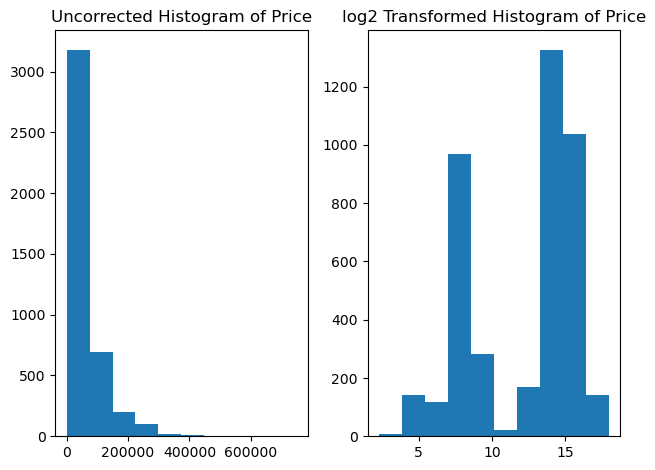

In [6]:
## Make a histogram of the house prices. Is this approximately normally distributed?
# Take log2 transform of the house prices. Make a histogram of the house prices after this transformation. What do you find?
counts, bins = np.histogram(filtered_real_estate["price"])
fig, (axs1, axs2) = plt.subplots(1,2)
axs1.hist(bins[:-1], weights=counts)
axs1.set_title("Uncorrected Histogram of Price")

counts, bins = np.histogram(np.log2(filtered_real_estate["price"]))
axs2.hist(bins[:-1], weights=counts)
axs2.set_title("log2 Transformed Histogram of Price")

plt.tight_layout()

- Heteroscedasticity pt 2
  - Scatterplot
    - For the houses with the “op_type” being “For sale”, make a scatter plot of the house price (y axis) vs the area (x axis).
        
    -  For the houses with the “op_type” being “For sale”, make a scatter plot of the log2 transformed house price (y axis) vs the area (x axis).
    -  For the houses with the “op_type” being “For rent”, make a scatter plot of the house price (y axis) vs the area (x axis).
    -  For the houses with the “op_type” being “For rent”, make a scatter plot of the log2 transformed house price (y axis) vs the area (x axis).
    -  Describe what you find.
        - **For area vs housing prices for sale and area vs housing prices for rent there is heteroscedasticity since the variation of the data points is not constant, causing there inconsistent spread around the regression line. The heteroscedasticity is improved by the log2 transformation for both housing prices for sale and housing prices for rent, but not completely alleviated.**

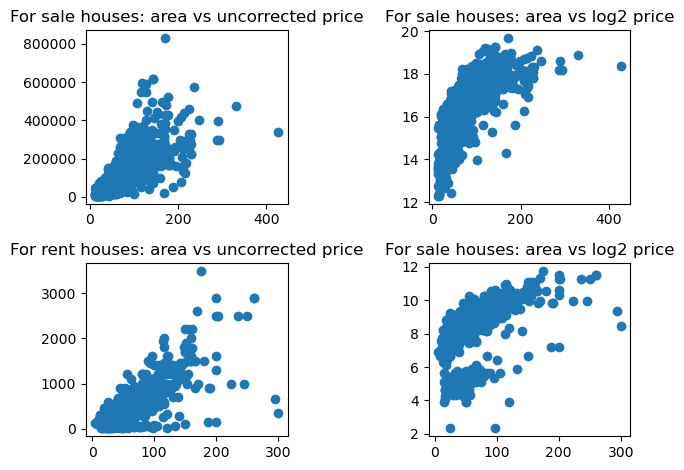

In [7]:
fig, axs = plt.subplots(2,2)

## For the houses with the “op_type” being “For sale”, make a scatter plot of the house price (y axis) vs the area (x axis).
# For the houses with the “op_type” being “For sale”, make a scatter plot of the log2 transformed house price (y axis) vs the area (x axis).

optype_for_sale = filtered_real_estate[filtered_real_estate.op_type.isin(["For sale"])]

axs[0,0].scatter(optype_for_sale["area"], optype_for_sale["price"])
axs[0,0].set_title("For sale houses: area vs uncorrected price")

axs[0,1].scatter(optype_for_sale["area"], np.log2(optype_for_sale["price"]))
axs[0,1].set_title("For sale houses: area vs log2 price")


# For the houses with the “op_type” being “For rent”, make a scatter plot of the house price (y axis) vs the area (x axis).
# For the houses with the “op_type” being “For rent”, make a scatter plot of the log2 transformed house price (y axis) vs the area (x axis).
optype_for_rent = filtered_real_estate[filtered_real_estate.op_type.isin(["For rent"])]
axs[1,0].scatter(optype_for_rent["area"], optype_for_rent["price"])
axs[1,0].set_title("For rent houses: area vs uncorrected price")

axs[1,1].scatter(optype_for_rent["area"], np.log2(optype_for_rent["price"]))
axs[1,1].set_title("For sale houses: area vs log2 price")
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=None)
plt.show()

- Question 2: For dataset “SCLC_study_output_filtered_2.csv” (rows = samples, columns=variables/signals), write Jupyter Notebook scripts to do the following.
    - Scaling
        - Write a function to do pareto scaling of all of the variables.
        - Make a plot comparing the standard deviation of each variable before and after the scaling

    - Describe what you find.
        - **After pareto scaling, the differences in standard deviation between variables are not as large as before scaling. However, the variables which have the largest standard deviation before scaling, still have largest standard deviations after scaling.** 

In [2]:
sclc = pd.read_csv("SCLC_study_output_filtered_2.csv", index_col=0)
sclc.head()

,295,464,961,1000,1076,1078,1150,1153,1162,1256,1259,1262,1276,1283,1365,1381,1387,1414,1553
NSCLC_A549_1,1246686.524,59929.70461,205990.1024,141932.6728,1581944.950,8.887623e+05,2010901.874,646161.3985,308624.5720,1226676.022,432775.5161,1682597.289,616102.1974,90521.64522,5.872333e+05,1664931.401,624615.6967,645473.1920,6.867305e+05
NSCLC_H1703_2,1338013.461,89261.66256,245504.4646,153877.9564,1540255.324,6.926569e+05,1551694.853,516276.2156,405340.4733,1604223.193,576127.4046,1399125.584,508743.2592,65972.45613,9.888830e+05,2281045.486,860709.5233,293504.7109,9.408252e+05
NSCLC_H1703_1,1040438.105,96002.36973,321302.7635,184414.1863,1638339.884,7.405865e+05,1437951.238,482798.7760,389654.6384,1555350.658,555434.0826,1378829.209,497591.3750,68732.01593,1.002957e+06,2026722.484,765475.8487,313811.6234,1.086556e+06
NSCLC_A549_2,1371135.588,81436.65785,299820.7353,261578.5732,1730887.909,1.144259e+06,2272554.651,773292.3518,362162.4799,1359538.194,495468.0917,1821494.948,635561.3457,89888.93269,6.085336e+05,1732423.877,649737.5435,762600.1361,8.461167e+05
NSCLC_H1437_1,1107105.986,92368.82235,225084.5830,149658.9117,1149976.279,1.306578e+06,2386937.600,802728.3053,345864.8827,1044867.464,377669.1186,1617663.099,568534.8039,84579.99092,2.421161e+05,1419139.504,531985.3086,459612.8875,4.022300e+05


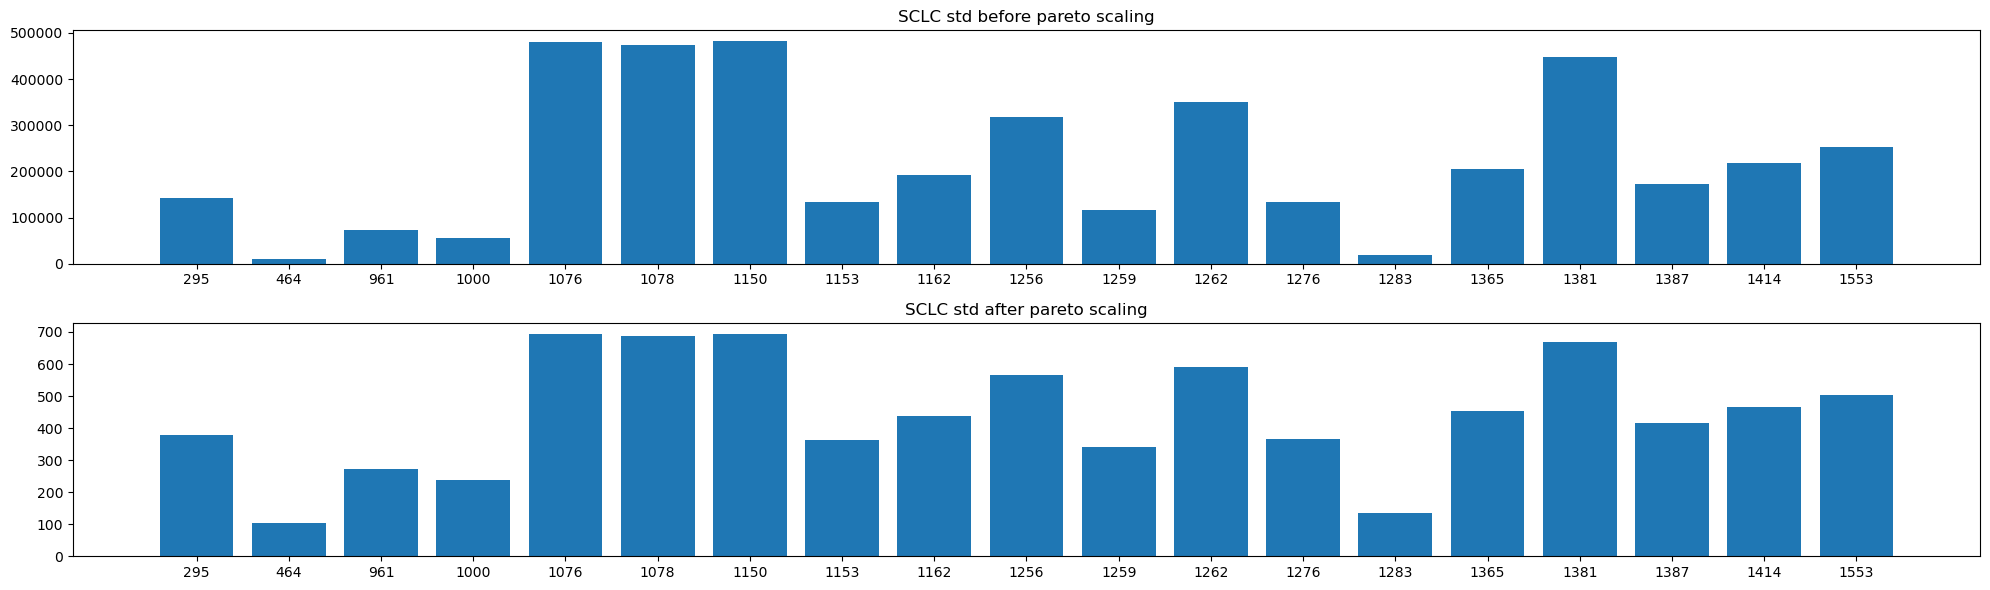

In [5]:
def pareto(df: pd.DataFrame):
    """Perfoms pareto scaling."""
    df2 = df.copy()
    colmeans = df.mean(axis = 0)
    col_names = list(df.columns)

    for col in col_names:
        col_std = sclc.std(axis = 0)
        # print(f"col: {col} sum: {sclc[col] - colmeans[col]}")
        df2[col] = (sclc[col] - colmeans[col])/np.sqrt(col_std)[col]
    
    return df2

pareto_sclc = pareto(sclc)


pareto_sclc_std = pareto_sclc.std(axis = 0)
sclc_std = sclc.std(axis = 0)


fig, axs = plt.subplots(2, figsize=(20,6))
axs[0].bar(list(sclc_std.index), sclc_std.values)
axs[0].set_title("SCLC std before pareto scaling")

axs[1].bar(list(pareto_sclc_std.index), pareto_sclc_std.values)
axs[1].set_title("SCLC std after pareto scaling")
plt.subplots_adjust(left=0.5, bottom=None, right=None, top=None, wspace=0.7, hspace=None)

plt.tight_layout()

- Question 2: For dataset “SCLC_study_output_filtered_2.csv” (rows = samples, columns=variables/signals), write Jupyter Notebook scripts to do the following.
    - Normalization
        - Write a function to do median normalization of the samples.
        - Make a plot comparing the median of all signals in a sample with the median of all signals in the sample after median normalization
    - Describe what you find.
        - **As expected, after median normalization all the medians are the same. Specifically, they are all -3.327221 post-normalization.**

In [17]:
sclc.loc["NSCLC_A549_1"]

295     1.246687e+06
464     5.992970e+04
961     2.059901e+05
1000    1.419327e+05
1076    1.581945e+06
1078    8.887623e+05
1150    2.010902e+06
1153    6.461614e+05
1162    3.086246e+05
1256    1.226676e+06
1259    4.327755e+05
1262    1.682597e+06
1276    6.161022e+05
1283    9.052165e+04
1365    5.872333e+05
1381    1.664931e+06
1387    6.246157e+05
1414    6.454732e+05
1553    6.867305e+05
Name: NSCLC_A549_1, dtype: float64

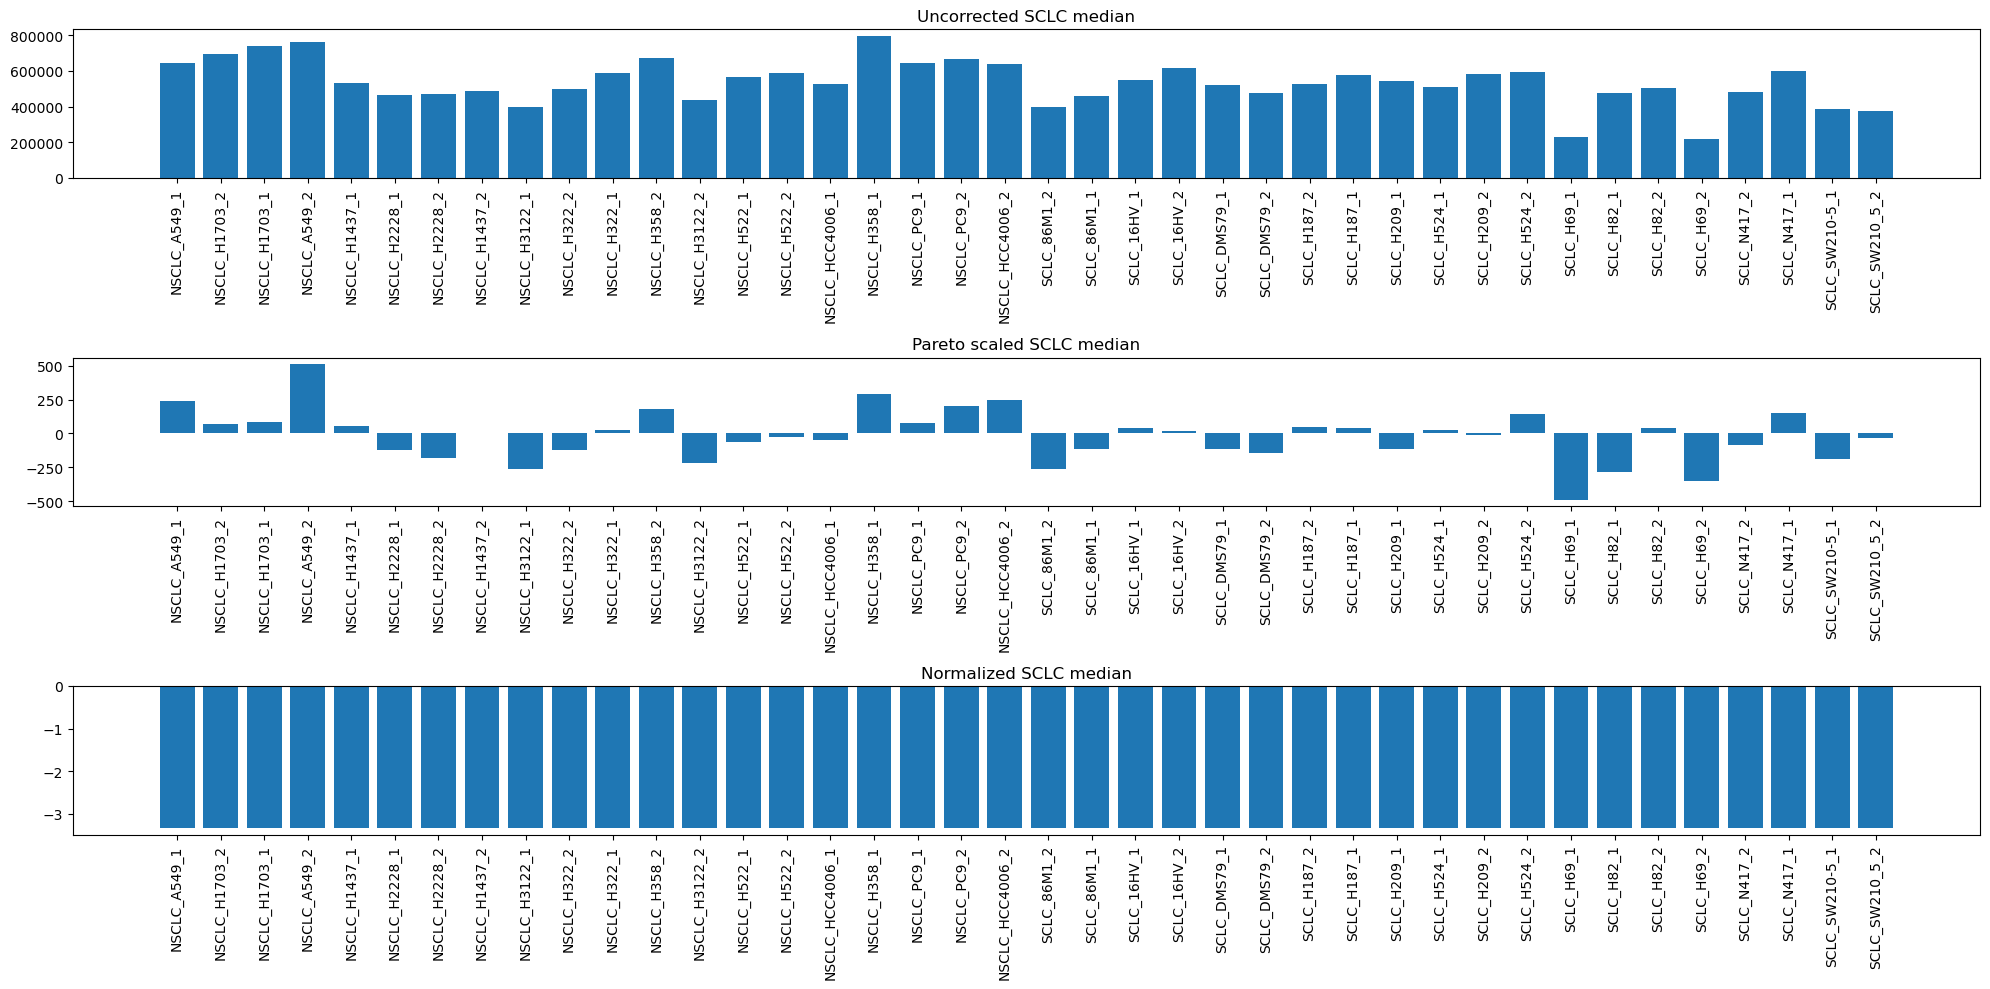

In [26]:
def median_normalizing(df: pd.DataFrame):
    """Takes a scaled dataframe and performs median normalizing."""
    df2 = df.copy()
    rowmedians = df2.median(1)

    median_of_row_medians = rowmedians.median(0)


    scaling_factor = median_of_row_medians / rowmedians
    for row in df.index:
        df2.loc[row] = df.loc[row] * scaling_factor.loc[row]
    return df2
normalized_sclc = median_normalizing(pareto_sclc)


## compute the medians
sclc_median = sclc.median(1)
pareto_sclc_median = pareto_sclc.median(1)
normalized_sclc_median = normalized_sclc.median(1)
## plot
fig, axs = plt.subplots(3, figsize = (20,10))
axs[0].bar(sclc_median.index, sclc_median.values)
axs[0].set_title("Uncorrected SCLC median")
axs[0].tick_params(axis='x', labelrotation=90)

axs[1].bar(pareto_sclc_median.index, pareto_sclc_median.values)
axs[1].set_title("Pareto scaled SCLC median")
axs[1].tick_params(axis='x', labelrotation=90)


axs[2].bar(normalized_sclc_median.index, normalized_sclc_median.values)
axs[2].set_title("Normalized SCLC median")
axs[2].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
